In [ ]:
!pip install vadersentiment
!pip install transformers
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier


# ***Load Data***

In [28]:
from google.colab import files
uploaded = files.upload()

Saving book_reviews_sample.csv to book_reviews_sample.csv


In [29]:
data = pd.read_csv('book_reviews_sample.csv')
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [31]:
print(data.columns)

Index(['index', 'reviewText', 'rating'], dtype='object')


In [32]:
data['reviewText'][0:10]

,reviewText
0,Clean and funny. A bit busy with all the diffe...
1,Alex a sexy hot cop and the PhD candidate. Wha...
2,Good thing that this is a free story. I read i...
3,"Action, action, action! Equipment keeps gettin..."
4,this was hands down the worse book i have ever...
5,"Great book packed full with fast cars , crazy ..."
6,I enjoyed the reader's digest very much. If I ...
7,This series has been good and I look forward t...
8,I just could not get into this book.I all ways...
9,it was good to see where Dan and Elle was. And...


# ***Clean Data***

In [33]:
#LowerCase
data['reviewText_clean'] = data['reviewText'].str.lower()

In [34]:
#Remove Punctuation
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", " ", x['reviewText_clean']), axis = 1)

In [ ]:
data.head()

# ***Rule-based sentiment with VADER***

In [35]:
vader_sentiment = SentimentIntensityAnalyzer()

In [36]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [37]:
#Create Label
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels = names)

<Axes: xlabel='vader_sentiment_label'>

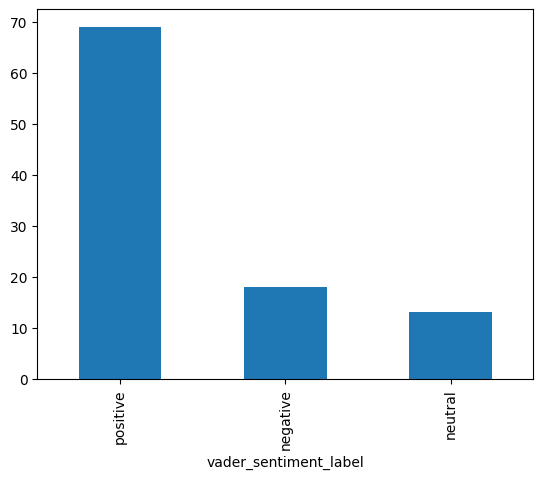

In [38]:
data['vader_sentiment_label'].value_counts().plot.bar()

# ***Pre-trained Transformer Model***

In [39]:
transformer_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [40]:
transformer_label = []
for review in data['reviewText_clean']:
  sentiment_list = transformer_pipeline(review)
  sentiment_label = [sent['label'] for sent in sentiment_list]
  transformer_label.append(sentiment_label)

data['transformer_sentiment_label'] = transformer_label

<Axes: xlabel='transformer_sentiment_label'>

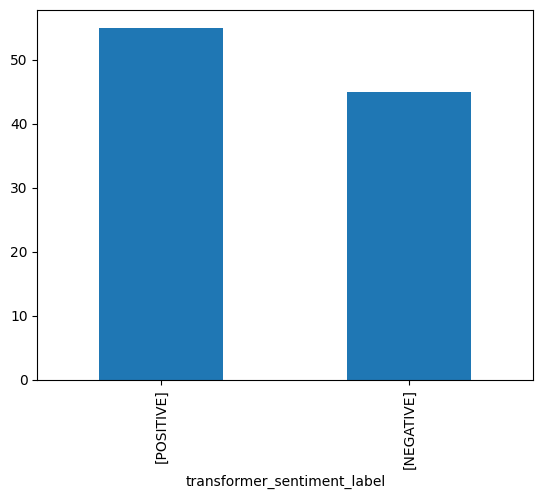

In [41]:
data['transformer_sentiment_label'].value_counts().plot.bar()